In [95]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100%}</style>'))

C:\Users\Chulho Jung\AppData\Local\Temp\ipykernel_14444\3579463758.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 서포트 벡터 머신 (Support Vector Machines)
- ## 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
- ## <font color='red'>클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터 (support vector)라고 함.</font>
- ## 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
- ## 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
- ## 서포트 벡터까자의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행

In [96]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [97]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_iris, load_wine, load_breast_cancer, load_diabetes
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

# SVM을 이용한 회귀 모델과 분류 모델

## SVM을 사용한 회귀 모델(SVR)

In [102]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.21772837063748762
평가 데이터 점수: 0.13544178468518187


## SVM을 사용한 분류 모델(SVC)

In [103]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법
- ### 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- ## scikit-learn 에서는 Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널 기법을 제공

In [108]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print('Linear SVR 학습 데이터 점수: {}'.format(linear_svr.score(X_train, y_train)))
print('Linear SVR 평가 데이터 점수: {}'.format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수: {}'.format(polynomial_svr.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수: {}'.format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print('RBF SVR 학습 데이터 점수: {}'.format(rbf_svr.score(X_train, y_train)))
print('RBF SVR 평가 데이터 점수: {}'.format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 점수: 0.7154978379572068
Linear SVR 평가 데이터 점수: 0.6380112028802827
Polynomial SVR 학습 데이터 점수: 0.2024454261446289
Polynomial SVR 평가 데이터 점수: 0.133668450367462
RBF SVR 학습 데이터 점수: 0.21772837063748762
RBF SVR 평가 데이터 점수: 0.13544178468518187


In [110]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print('Linear SVC 학습 데이터 점수: {}'.format(linear_svc.score(X_train, y_train)))
print('Linear SVC 평가 데이터 점수: {}'.format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수: {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print('RBF SVC 학습 데이터 점수: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수: {}'.format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Polynomial SVR 학습 데이터 점수: 0.9014084507042254
Polynomial SVR 평가 데이터 점수: 0.9230769230769231
RBF SVC 학습 데이터 점수: 0.9014084507042254
RBF SVC 평가 데이터 점수: 0.9230769230769231


## 매개변수 튜닝
- ### SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
- ### 매개변수를 변경하면서 성능변화를 관찰

In [111]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print('kernel=poly, defree={}, C={}, gamma={}'.format(2, 0.1, 'auto'))
print('Polynomial SVR 학습 데이터 점수: {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))


kernel=poly, defree=2, C=0.1, gamma=auto
Polynomial SVR 학습 데이터 점수: 0.9835680751173709
Polynomial SVR 평가 데이터 점수: 0.993006993006993


In [112]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print('kernel=rbf, C={}, gamma={}'.format(2.0, 'scale'))
print('RBF SVC 학습 데이터 점수: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 점수: {}'.format(rbf_svc.score(X_test, y_test)))

kernel=rbf, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수: 0.9154929577464789
RBF SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리
- ### SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
- ### 주로 모든 특성 값을 [0, 1] 점위로 맞추는 방법을 사용
- ### scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [113]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [114]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [117]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.986013986013986


## Linear SVR

- ### 보스턴 주택 가격

In [124]:
X, y = load_boston(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7245983513692006
평가 데이터 점수: 0.6147612862092724


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


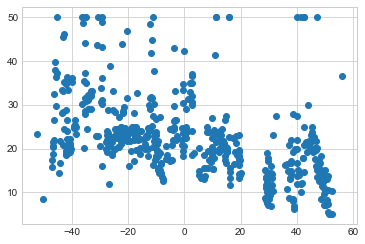

In [127]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

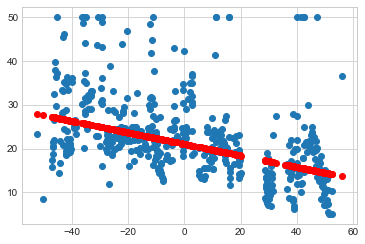

In [128]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='red')

In [129]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.01361179, 0.01637959, 0.01395917, 0.01237249, 0.01351213]),
 'score_time': array([0.00099635, 0.00197315, 0.00146937, 0.00199461, 0.00099325]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [130]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [131]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

- ### 당료병

In [132]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.492458871681117
평가 데이터 점수: 0.5570136940699908


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


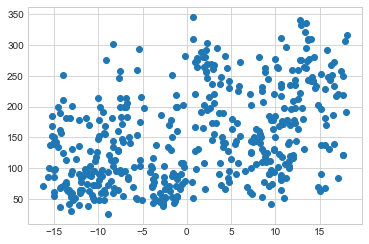

In [135]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

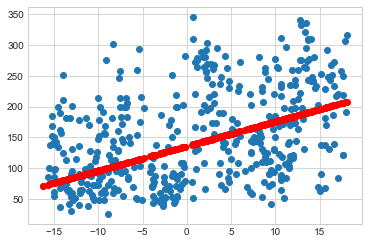

In [136]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='red')

In [137]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01459742, 0.00861812, 0.00861812, 0.01061082, 0.01260448]),
 'score_time': array([0.00199318, 0.00199318, 0.00298977, 0.00199366, 0.00199318]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [138]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [139]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

- ### 보스턴 주택 가격

In [142]:
X, y = load_boston(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [143]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6804558691341751
평가 데이터 점수: 0.5895829313193317


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


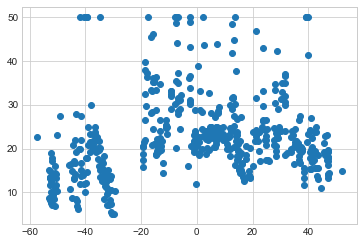

In [145]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

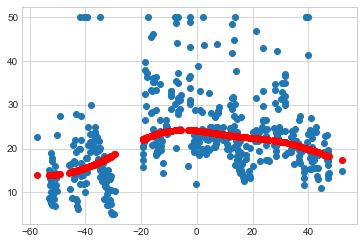

In [146]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='red')

In [147]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01653123, 0.01066613, 0.01454377, 0.01266074, 0.01349449]),
 'score_time': array([0.00501704, 0.00398755, 0.00600934, 0.00589895, 0.00600934]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [148]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf','poly','sigmoid']}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [149]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [150]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVR(kernel='rbf'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]


gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [151]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

- ### 당료병

In [152]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [153]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.15345164466149952
평가 데이터 점수: 0.18096718824416858


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


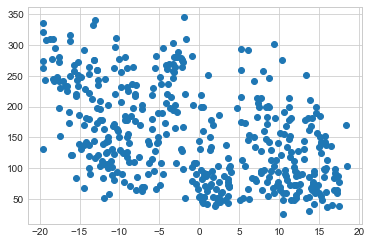

In [155]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

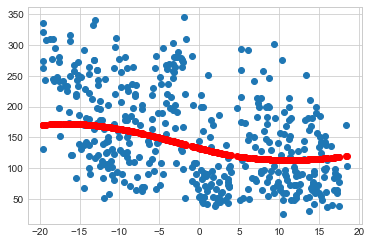

In [156]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='red')

In [157]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01225805, 0.00837636, 0.01265502, 0.01043963, 0.01043963]),
 'score_time': array([0.00920987, 0.00509143, 0.00891614, 0.00423098, 0.00515318]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [158]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVR(kernel='rbf'))])

param_grid = [{'model__kernel':['rbf','poly','sigmoid']}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [159]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [160]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]


gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [161]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='sigmoid'))])

In [163]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3726520070304975
평가 데이터 점수: 0.3905617056363221


## Linear SVC

- ### 유방암

In [164]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [165]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9912280701754386


In [167]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, x.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                        np.arange(y_min, y_max, h))
    return xx, yy

In [168]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [169]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


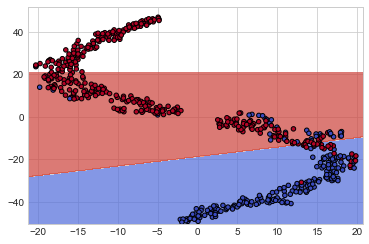

In [170]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [171]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00584888, 0.00535226, 0.00468111, 0.00568295, 0.00547266]),
 'score_time': array([0.00100183, 0.00049663, 0.00100183, 0.00099611, 0.        ]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [172]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01]}]

# param_grid = [{'model__kernel':['rbf','poly','sigmoid']}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [173]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

- ### 붓 꽃

In [174]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9833333333333333
평가 데이터 점수: 0.9333333333333333


In [177]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, x.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                        np.arange(y_min, y_max, h))
    return xx, yy

In [178]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [179]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


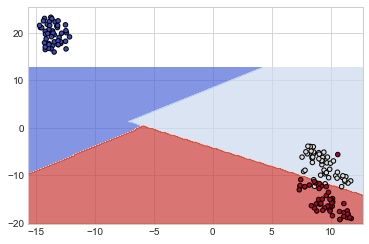

In [180]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [181]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00199413, 0.00199413, 0.00099754, 0.00199342, 0.00099587]),
 'score_time': array([0.        , 0.        , 0.00099587, 0.00099921, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [182]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01]}]

# param_grid = [{'model__kernel':['rbf','poly','sigmoid']}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [183]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

- ### 와인

In [184]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [185]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9444444444444444


In [187]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, x.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                        np.arange(y_min, y_max, h))
    return xx, yy

In [188]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [189]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


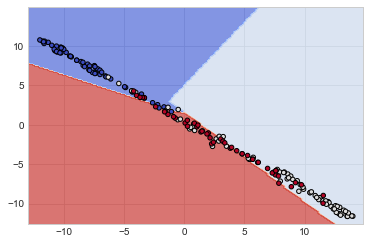

In [190]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [191]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099707, 0.00199366, 0.0019927 , 0.0019927 , 0.00099611]),
 'score_time': array([0.00099659, 0.00099611, 0.        , 0.00099659, 0.        ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [192]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01]}]

# param_grid = [{'model__kernel':['rbf','poly','sigmoid']}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [193]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

## Kernel SVC

- ### 유방암

In [194]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [195]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9824561403508771


In [197]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, x.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                        np.arange(y_min, y_max, h))
    return xx, yy

In [198]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [199]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)


C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chulho Jung\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


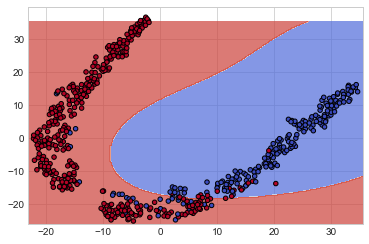

In [200]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [201]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00498056, 0.00498056, 0.0049808 , 0.0051775 , 0.00867677]),
 'score_time': array([0.00099635, 0.00099635, 0.00119138, 0.00049853, 0.00100327]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [202]:
pipe = Pipeline([('scaler', StandardScaler()), ('model',SVC(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01]}]

# param_grid = [{'model__kernel':['rbf','poly','sigmoid']}]

gs = GridSearchCV(estimator=pipe, 
                 param_grid=param_grid,
                 n_jobs=multiprocessing.cpu_count(),
                 cv = 5, 
                 verbose=True)

gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [203]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])